# Process example for FEEM data

EDIT instructions

ADD pick model !!!  and info from Katharina's database

AND show the fit not just the % described

Change the absorbance AND DOC data to match your data. You can also change the reporting wavelength for the SAC value.

the first cell is for housekeepings stuff that just sets the relative paths so the data and scripts can be found.

the second cell inputs the data ... so here is where you need to specify the filename (in the DATA OR PRIVATE directory (not both)).  Also you tell the DOC here.

The third cell plots the data

The fourth cell tells the SAC value (Based on measured abs and DOC).  you NEED to specify the wavelength if you want something other than 340nm (the way I wrote it originally is for 340 nm).

In [5]:
% housekeeping
% add scriptpath and OPENFluordatabase
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-13);
scriptpath=[rootpath,'/FEEMscripts'];
addpath(scriptpath);
OPENFluorpath=[rootpath,'/OPENFluordatabase'];
addpath(OPENFluorpath);
% add  datapath privatedata paths
rootpath=txt; rootpath=txt;
datapath=[rootpath,'/DATA'];
addpath(datapath);
privatepath=[rootpath,'/PRIVATE']; c=exist(privatepath); % only add path if it exists
if c>0; addpath(privatepath); end
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 

In [6]:
%input the FEEM data file and DOC conc

% you have to change this to match the data in either the DATA directory
% or the PRIVATE directory.  NOT in both places.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
dataname=['templateFEEMdata']; DOC=7.164;
caxisvalue=[]; % put in a caxisvalue if you want a fixed colour axis (to compare between samples, otherwise it automatically rescales)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%555

txt=['[data]=',dataname,';']; eval(txt)

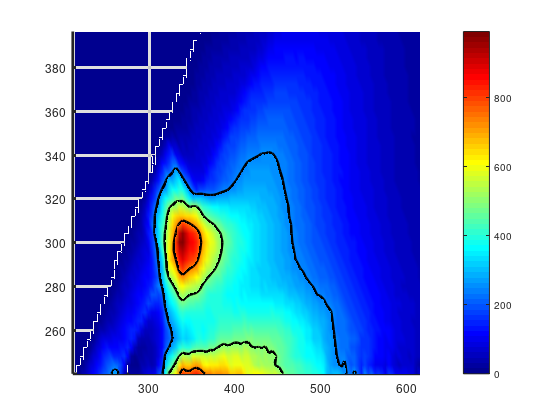

In [7]:
% process the data
scatterfactor=0.01; exmin=240; exmax=400; flagg=0; 
[F,em,ex]=Fprocess(data,scatterfactor,exmin,exmax,flagg);
%interpolate to fill scattered light to make prettier plots
scatterfactor=0.085; %exmin=240; exmax=400; 
stepsize=4; %stepsize is the nm gap on ex and em resampling, if 0 use the original
flagg=0; % no diagnostic plot.  if flag=1 then plot to make sure scatter "zeros" are all gone
[F,em,ex]=FINTERPFILL(data,scatterfactor,exmin,exmax,stepsize,flagg);

if isempty(caxisvalue)==1; caxisvalue=max(max(F./DOC)); end
makecontourplot(F./DOC,em,ex,1); caxis([0 caxisvalue]);   colorbar

In [8]:
% report optical indices

BIX=calcBIX(F,em,ex)
gap=1; HI1=calcHI(F,em,ex,gap)
FI=calcFI(F,em,ex)
[Trp,HA,FA,Tyr,percentdataexplained]=parafaclite(F,em,ex)

BIX = 1.3906e+00


HI1 = 2.0444e+00


FI = 1.2520e+00


Execution exception: 'exmodelfun' undefined near line 5, column 9